<a href="https://colab.research.google.com/github/AnastasiyaRahulina/Women-in-Data-Science-Datathon-March-2024/blob/main/WIDS_datathone_EDA_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/WinDS/training.csv")
data_test = pd.read_csv("/content/drive/MyDrive/WinDS/test.csv")

In [ ]:
data.head()


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
data.info()

#EDA

In [ ]:
data['DiagPeriodL90D'].value_counts()

1    8060
0    4846
Name: DiagPeriodL90D, dtype: int64

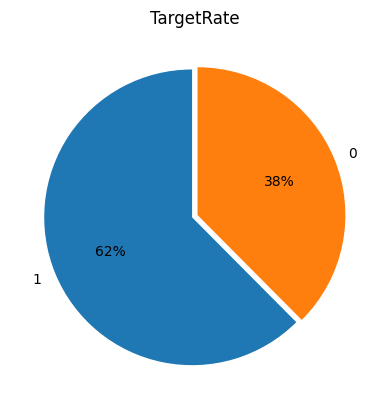

In [ ]:
plt.pie(data['DiagPeriodL90D'].value_counts().values,labels=data['DiagPeriodL90D'].value_counts().index,autopct="%1.0f%%",explode=(0.02, 0.02),startangle=90)
plt.title("TargetRate")
plt.show()

Target variable is unbalanced

In [ ]:
data.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


<Axes: xlabel='None'>

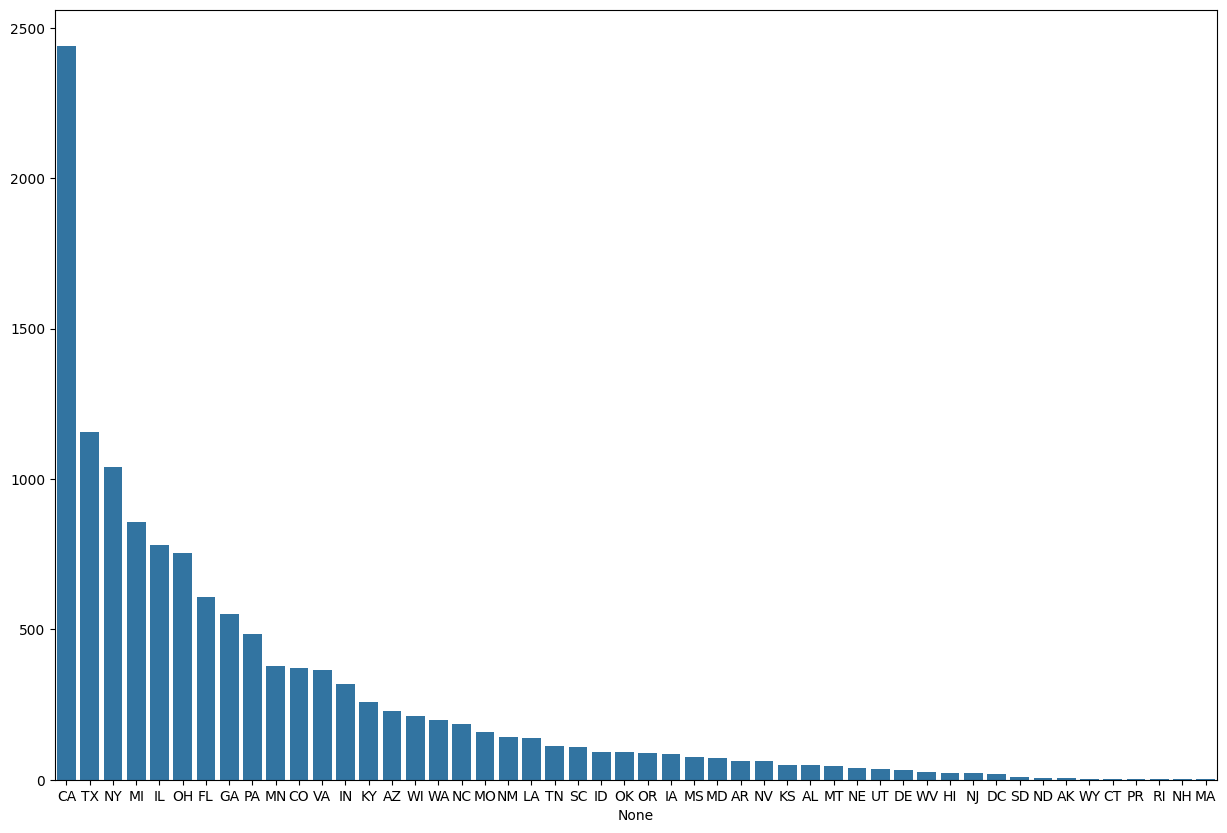

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['patient_state'].value_counts().index, y=data['patient_state'].value_counts().values)


In [ ]:
data.loc[data['patient_state']=='RI']

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
2072,154150,White,MEDICAID,RI,112,55,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.72274,7.879795,27.496367,1


In [ ]:
data['metastatic_first_novel_treatment'].value_counts()

PEMBROLIZUMAB    13
OLAPARIB         11
Name: metastatic_first_novel_treatment, dtype: int64

In [ ]:
data['patient_race'].value_counts()

White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: patient_race, dtype: int64

In [ ]:
data['patient_gender'].value_counts()
#only females in dataset

F    12906
Name: patient_gender, dtype: int64

<Axes: xlabel='patient_age', ylabel='Density'>

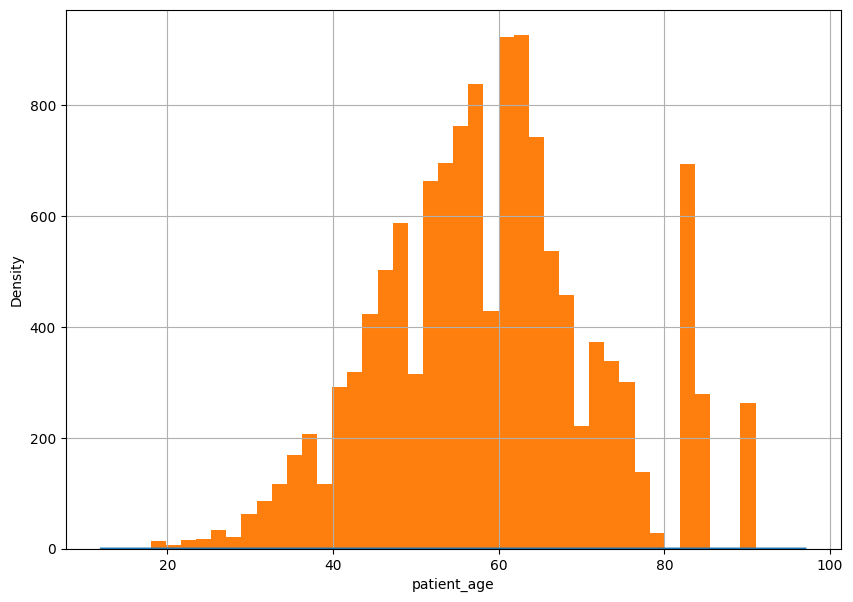

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(data['patient_age'])
data['patient_age'].hist(bins=40, figsize=(10,7))

<Axes: ylabel='patient_age'>

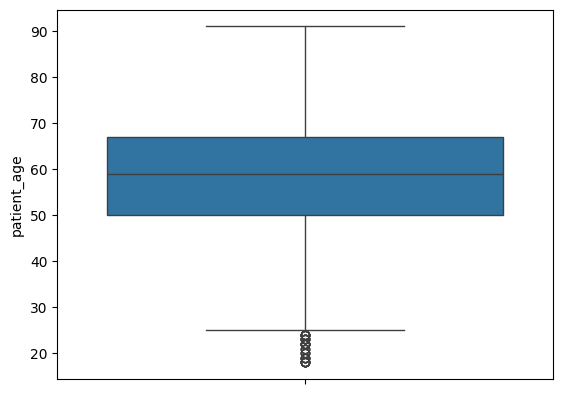

In [ ]:
sns.boxplot(data['patient_age'])

In [ ]:
data['patient_age'].describe()

count    12906.000000
mean        59.183326
std         13.335216
min         18.000000
25%         50.000000
50%         59.000000
75%         67.000000
max         91.000000
Name: patient_age, dtype: float64

In [ ]:
data['metastatic_first_novel_treatment_type'].value_counts()

Antineoplastics    24
Name: metastatic_first_novel_treatment_type, dtype: int64

In [ ]:
data['Division'].value_counts()

East North Central    2923
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
New England              5
Name: Division, dtype: int64

In [ ]:
features = ['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_white', 'race_black', 'race_asian', 'race_native',
       'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled',
       'poverty', 'limited_english', 'commute_time', 'health_uninsured',
       'veteran', 'Ozone', 'PM25', 'N02']

In [ ]:
len(features)

82

In [ ]:
data_num = data.select_dtypes(include='number')

In [ ]:
data_num.columns

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
     

In [ ]:
len(data_num.columns)

72

In [ ]:
fig, axes = plt.subplots(nrows= len(data_num.columns)//3, ncols=3, figsize=(7, 40))
for fig, axes in zip(data_num.columns, axes.flatten()):
  sns.barplot(y=fig, x='DiagPeriodL90D', data=data_num, ax=axes)


plt.tight_layout()
plt.show()


In [ ]:
num_features = ['patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_graduate', 'education_college_or_above',
       'education_stem_degree', 'labor_force_participation',
       'unemployment_rate', 'self_employed', 'farmer', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'hispanic', 'disabled', 'poverty', 'limited_english',
       'commute_time', 'health_uninsured', 'veteran', 'Ozone', 'PM25', 'N02']

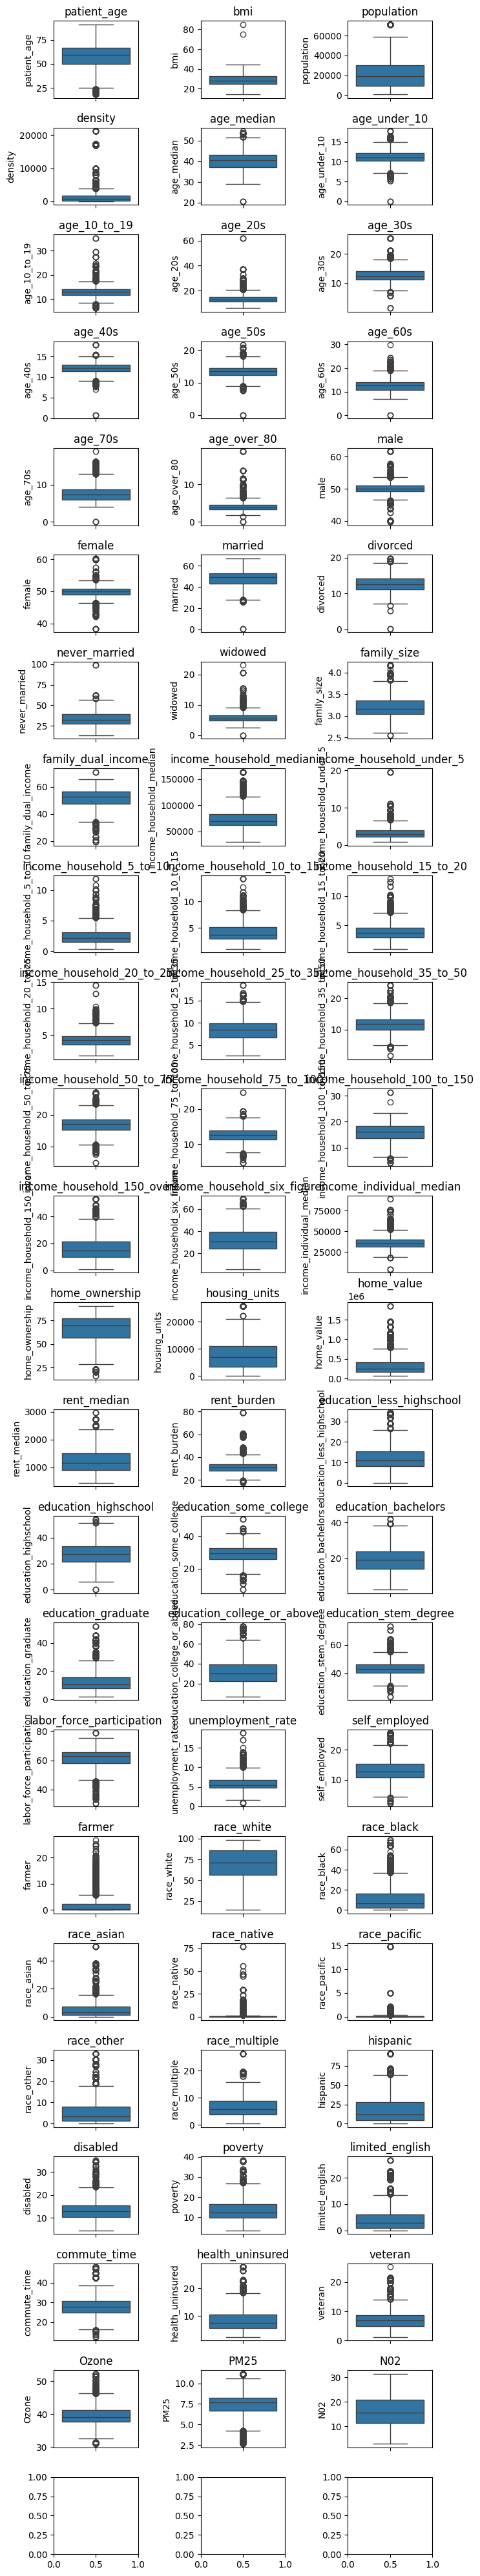

In [ ]:
fig, axes = plt.subplots(nrows= len(data_num.columns)//3, ncols=3, figsize=(7, 40))
for fig, axes in zip(num_features, axes.flatten()):
  sns.boxplot(data_num[fig], ax=axes)
  axes.set_title(fig)


plt.tight_layout()
plt.show()

##Missing values

<Axes: >

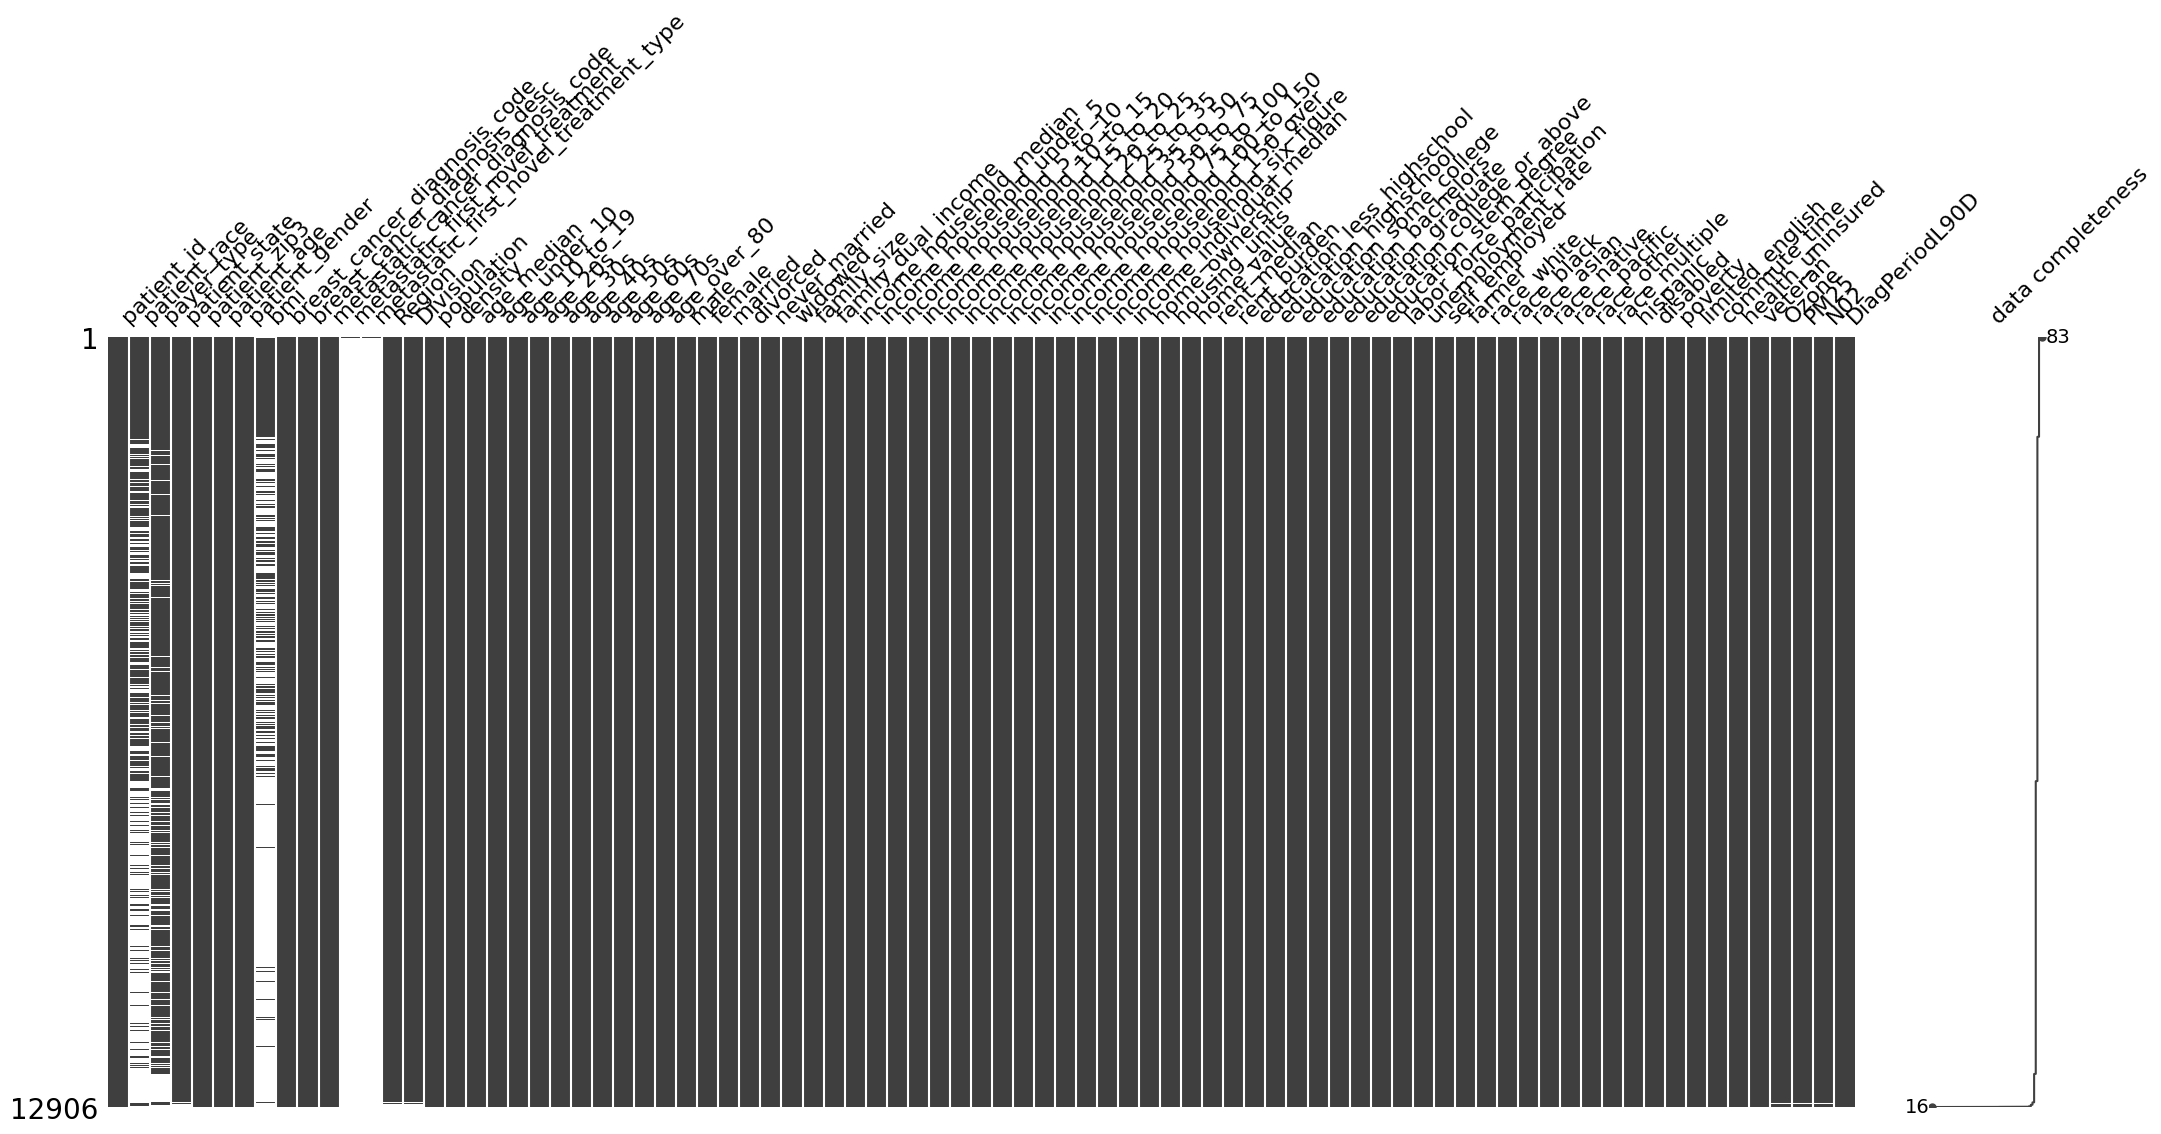

In [ ]:
import missingno as msno

msno.matrix(data, labels=True, sort="descending")

In [ ]:
data.isnull().sum().sort_values(ascending=False)



metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
bmi                                       8965
patient_race                              6385
payer_type                                1803
                                         ...  
breast_cancer_diagnosis_code                 0
patient_gender                               0
patient_age                                  0
patient_zip3                                 0
DiagPeriodL90D                               0
Length: 83, dtype: int64

# Data preprocessing pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = data.drop(columns=['DiagPeriodL90D', 'patient_id', 'patient_gender', 'bmi',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type'])
y = data['DiagPeriodL90D']


In [ ]:
cats = X.select_dtypes(exclude=np.number).columns.tolist()
cats

['patient_race',
 'payer_type',
 'patient_state',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'Region',
 'Division']

In [ ]:
nums = X.select_dtypes(include=np.number).columns.tolist()
nums
# exclude zip !

['patient_zip3',
 'patient_age',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',

In [ ]:
#imputing missing categorical values with 'unknown'

cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
num_imputer = SimpleImputer(strategy='median')

X[cats] = cat_imputer.fit_transform(X[cats])
X[nums] = num_imputer.fit_transform(X[nums])

In [ ]:
X.isnull().sum().sort_values(ascending=False)

patient_race                  0
education_less_highschool     0
labor_force_participation     0
education_stem_degree         0
education_college_or_above    0
                             ..
divorced                      0
married                       0
female                        0
male                          0
N02                           0
Length: 76, dtype: int64

In [ ]:
for col in cats:
   X[col] = X[col].astype('category')

In [ ]:
X.dtypes

patient_race        category
payer_type          category
patient_state       category
patient_zip3         float64
patient_age          float64
                      ...   
health_uninsured     float64
veteran              float64
Ozone                float64
PM25                 float64
N02                  float64
Length: 76, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)
X_train.shape, X_test.shape


((9679, 76), (3227, 76))

In [ ]:
import xgboost as xgb


In [ ]:
from xgboost import XGBClassifier

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True)

In [ ]:
# declare parameters
params = {'max_depth': 7,
                     'min_child_weight': 7,
                     'learning_rate': 0.03623064007788684,
                     'n_estimators': 156,
                     'subsample': 0.7998314753884036,
                     'colsample_bytree': 0.7477252560918937,
                     'random_state': 42}


# instantiate the classifier
xgb_clf = XGBClassifier(**params, enable_categorical=True)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7477252560918937, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03623064007788684,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=156, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

print('XGBoost model roc_auc score: {0:0.4f}'. format(roc_auc_score(y_test, y_pred)))

XGBoost model roc_auc score: 0.7563


#Cross validation

In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.582820,0.010631,0.536912,0.005559
1,0.628560,0.007068,0.583980,0.001898
2,0.807146,0.005427,0.783589,0.003263
3,0.808922,0.005639,0.783421,0.003906
4,0.809173,0.005410,0.783225,0.003539


In [ ]:
xgb_cv['test-auc-mean'].max(), xgb_cv['train-auc-mean'].max()

(0.7900320805134845, 0.8474898376249381)

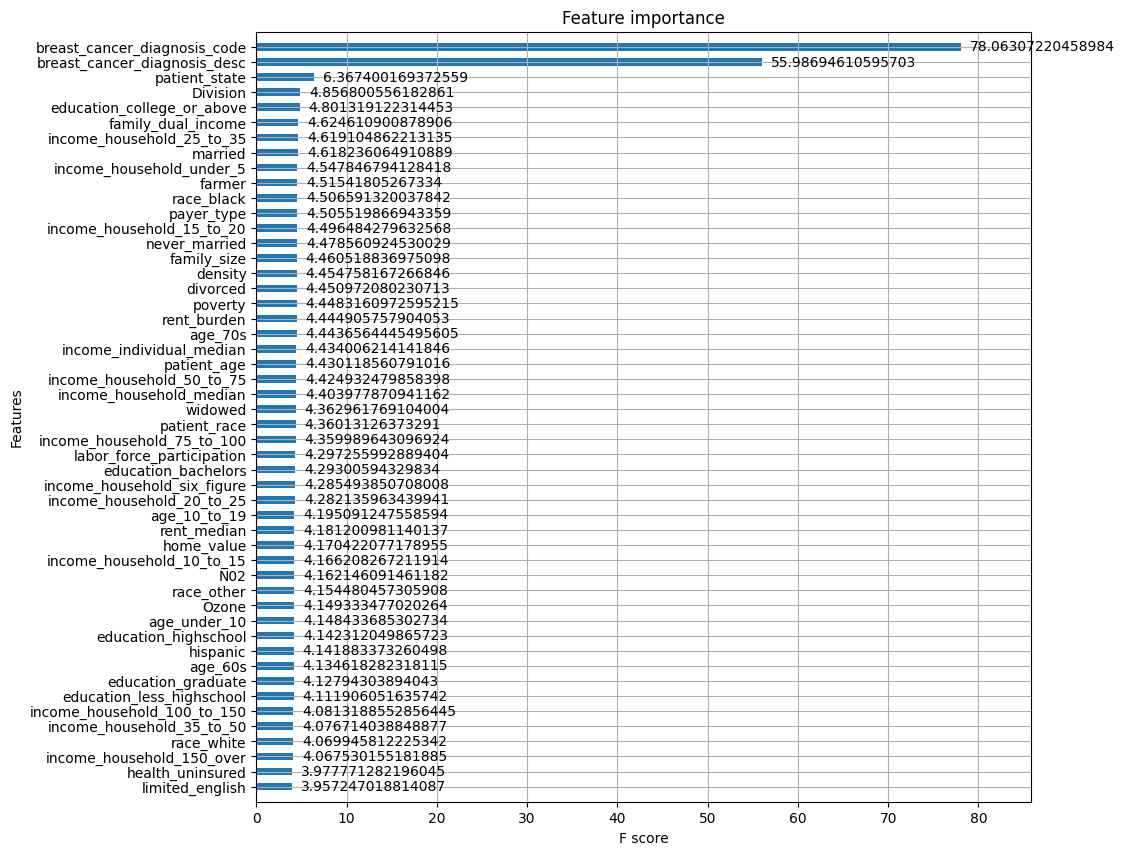

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_clf, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

## Optuna huperperamerter tuning

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'random_state': 42
    }

    xgb_model = XGBClassifier(**params, enable_categorical=True)

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    return auc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-02-13 16:23:27,982] A new study created in memory with name: no-name-9e6f9804-ced3-4a64-877c-fa3979031c66
[I 2024-02-13 16:23:32,601] Trial 0 finished with value: 0.7813383108640624 and parameters: {'n_estimators': 75, 'learning_rate': 0.030494447148792334, 'max_depth': 4, 'subsample': 0.6511166678789146, 'colsample_bytree': 0.904004440760566, 'gamma': 1.5163912287458885e-06}. Best is trial 0 with value: 0.7813383108640624.
[I 2024-02-13 16:23:47,256] Trial 1 finished with value: 0.7699058262971084 and parameters: {'n_estimators': 271, 'learning_rate': 0.05256955273637343, 'max_depth': 5, 'subsample': 0.7029937823340207, 'colsample_bytree': 0.6093793283421327, 'gamma': 4.300768022675532e-06}. Best is trial 0 with value: 0.7813383108640624.
[I 2024-02-13 16:23:48,585] Trial 2 finished with value: 0.7826356851797746 and parameters: {'n_estimators': 126, 'learning_rate': 0.00860048446405925, 'max_depth': 4, 'subsample': 0.831918615965388, 'colsample_bytree': 0.960117603026021, 'ga

In [ ]:
best_params = study.best_params

best_params

{'n_estimators': 187,
 'learning_rate': 0.012668683488545229,
 'max_depth': 3,
 'subsample': 0.7161566699246026,
 'colsample_bytree': 0.5003974448242979,
 'gamma': 1.794338474061719e-07}

In [ ]:
xgb_model = XGBClassifier(**best_params, random_state=42, enable_categorical=True)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5003974448242979, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=1.794338474061719e-07,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.012668683488545229,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=187, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f'XGBoost: AUC = {auc:.4f}')

XGBoost: AUC = 0.7865


#Shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
import shap

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


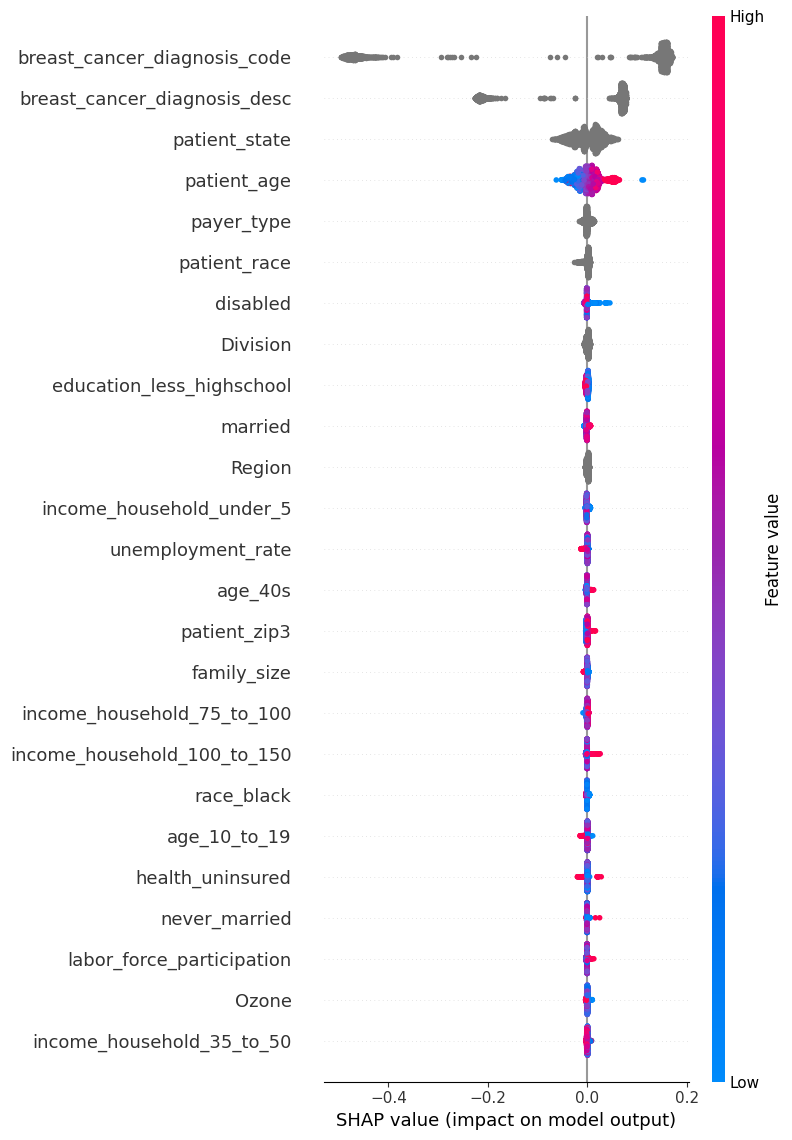

In [ ]:
shap_test = shap.TreeExplainer(xgb_model).shap_values(X_test)
shap.summary_plot(shap_test, X_test,
                      max_display=25, auto_size_plot=True)

In [ ]:
from shap import TreeExplainer

shap_explainer = TreeExplainer(xgb_model)
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
shap_values = pd.DataFrame(shap_values, columns=X_train.columns)
shap_values

,patient_race,payer_type,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,Region,Division,population,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,0.001942,-0.002341,-0.021113,0.000796,-0.019943,0.156185,0.071288,0.001433,0.002435,9.737188e-06,...,0.000468,-0.000859,0.000266,-0.000107,-0.000011,0.000919,-0.000071,0.000970,-0.000114,-0.000107
1,0.001607,-0.000996,0.021142,-0.000135,0.003616,0.158577,0.073753,0.001326,0.001784,-1.950394e-05,...,-0.000294,0.001727,0.000189,0.000059,-0.000049,0.000553,0.000080,-0.001048,-0.000416,0.000109
2,0.001658,0.005410,-0.042601,0.000441,0.059432,0.149020,0.068878,-0.002390,-0.003149,-5.826048e-05,...,-0.000323,-0.000959,-0.000303,-0.000532,0.000232,-0.014357,-0.000532,-0.000404,-0.000392,-0.001331
3,0.000384,0.006851,0.004736,-0.001356,0.001102,-0.483462,-0.220675,0.000653,0.000896,2.419413e-05,...,0.000143,-0.004603,-0.000725,0.000081,-0.000033,-0.000300,-0.000159,-0.000642,-0.000352,0.000103
4,0.001570,-0.001698,-0.000912,-0.001087,-0.014908,0.151769,0.071642,-0.001442,-0.002180,-4.852333e-06,...,-0.000067,0.004269,0.001108,0.000046,-0.000120,0.000856,0.000075,0.000167,0.000381,-0.000426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,0.002020,0.005431,0.019346,0.001320,0.029530,0.157866,0.070833,0.001239,0.001508,-4.307615e-04,...,-0.000112,0.001708,0.000210,0.000039,-0.000295,-0.000091,0.000176,-0.001503,-0.000289,0.000051
9675,0.001677,-0.002201,0.026024,-0.000270,0.005713,0.156414,0.073834,0.001324,0.002462,4.205375e-07,...,-0.000291,-0.000920,-0.000333,0.000034,0.000015,0.000196,-0.000025,-0.002834,0.001081,0.000161
9676,0.002322,-0.007285,0.004176,0.002120,0.002953,0.147631,0.067693,0.001990,0.002494,-2.498871e-06,...,0.000290,0.001562,0.001256,0.000054,0.000119,0.000461,0.000278,0.000932,0.000661,-0.000397
9677,0.000751,0.007835,-0.005187,-0.001025,-0.011273,-0.472026,-0.213220,-0.001151,-0.001782,-9.935544e-06,...,0.000097,-0.002887,-0.000655,0.000024,-0.000149,-0.000338,-0.000315,-0.000821,-0.000214,0.000098


In [ ]:
def shap_sum2proba(shap_sum):
  """Compute sigmoid function of the Shap sum to get predicted probability."""
  return 1 / (1 + np.exp(-shap_sum))

In [ ]:
def individual_log_loss(y_true, y_pred, eps=1e-15):
  """Compute log-loss for each individual of the sample."""

  y_pred = np.clip(y_pred, eps, 1 - eps)
  return - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

In [ ]:
prediction_contribution = shap_values.abs().mean()
prediction_contribution

patient_race        0.002706
payer_type          0.004480
patient_state       0.022492
patient_zip3        0.000973
patient_age         0.016645
                      ...   
health_uninsured    0.000846
veteran             0.000156
Ozone               0.000679
PM25                0.000420
N02                 0.000190
Length: 76, dtype: float32

In [ ]:
y_pred_wo_feature = shap_values.apply(lambda feature: shap_values.sum(axis=1) - feature).applymap(shap_sum2proba)


In [ ]:
ind_log_loss_wo_feature = y_pred_wo_feature.apply(lambda feature: individual_log_loss(y_true=y_test, y_pred=feature))


In [ ]:
ind_log_loss = individual_log_loss(y_true=y_test, y_pred=y_pred)
ind_log_loss_diff = ind_log_loss_wo_feature.apply(lambda feature: ind_log_loss - feature)

In [ ]:
ind_log_loss_diff

In [ ]:
error_contribution = ind_log_loss_diff.mean()

In [ ]:
error_contribution.sort_values(ascending=False)

# make predictions on a test set

In [ ]:
X_test = data_test.drop(columns=['patient_id', 'patient_gender', 'bmi',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type'])


In [ ]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
num_imputer = SimpleImputer(strategy='median')

X_test[cats] = cat_imputer.fit_transform(X_test[cats])
X_test[nums] = num_imputer.fit_transform(X_test[nums])

In [ ]:
for col in cats:
   X_test[col] = X_test[col].astype('category')

In [ ]:
final_predictions = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
submission_df = pd.DataFrame({'patient_id': data_test['patient_id'], 'DiagPeriodL90D': final_predictions})
submission_df.to_csv('submission7.csv', index=False)